In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('cases-by-day.csv')

Text(0.5, 1.0, 'Infected per month')

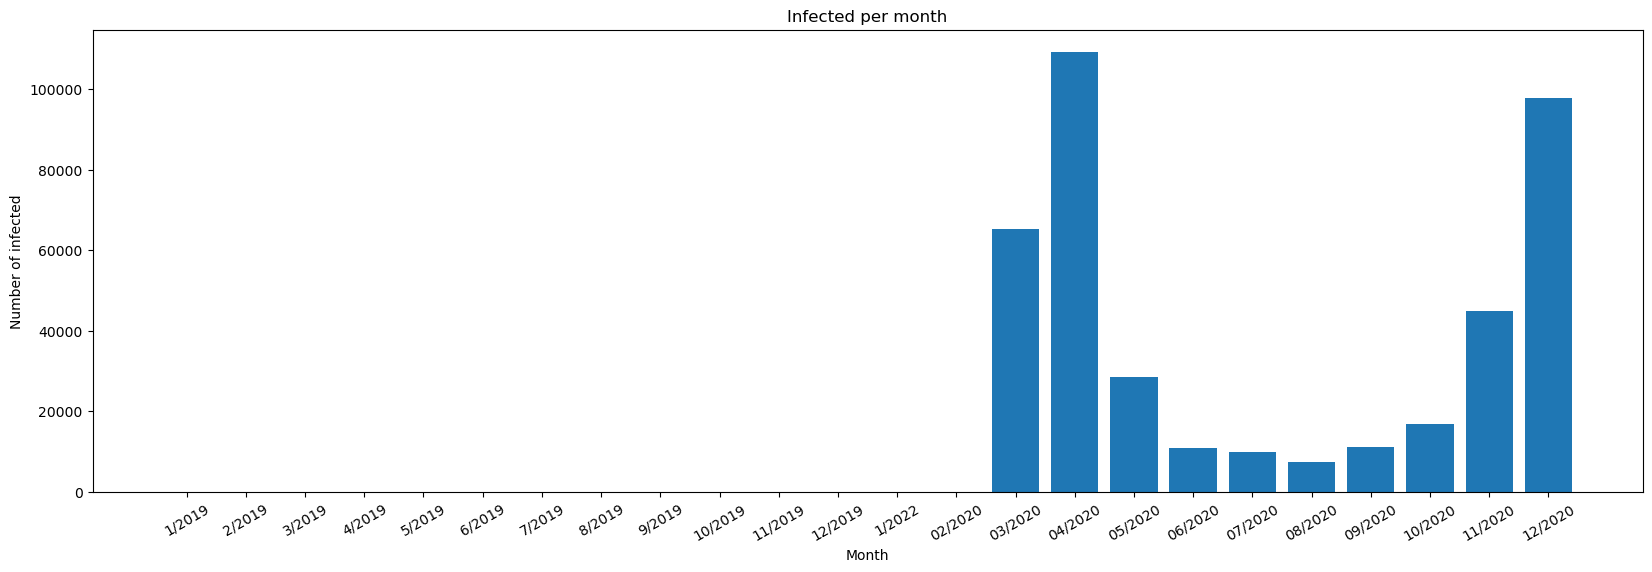

In [27]:
month = []
current_month = ""
month_case_count = []

for year in range (19, 20):
    for mon in range (1, 13):
        m = str(mon)
        month.append(m+"/20"+str(year))
        month_case_count.append(0)
month.append("1/2022")
month_case_count.append(0)

for i in range(df.shape[0]):
    if df['date_of_interest'][i][6:] == "2021":
        break
    if df['date_of_interest'][i][0:3]+df['date_of_interest'][i][6:] != current_month:
        month.append(df['date_of_interest'][i][0:3]+df['date_of_interest'][i][6:])
        month_case_count.append(df["CASE_COUNT"][i])
        current_month = df['date_of_interest'][i][0:3]+df['date_of_interest'][i][6:]
    else:
        month_case_count[-1] += df["CASE_COUNT"][i]

monthly_count = pd.DataFrame({"month": month,"month_case_count": month_case_count})

plt.figure(figsize=(20,6))
plt.bar(monthly_count["month"], monthly_count["month_case_count"])
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Month")
plt.ylabel("Number of infected")
plt.title("Infected per month")

In [9]:
df2 = []
month_for_df2 = []
for year in range (19, 21):
    for month in range (1, 13):
        m = str(month)
        if month < 10:
            m = '0' + m
        dataset_name = "project/20" + str(year)+m+'-citibike-tripdata.csv'
        month_for_df2.append(m+"/20"+str(year))
        df2.append(pd.read_csv(dataset_name))


Text(0.5, 1.0, 'ridership per month')

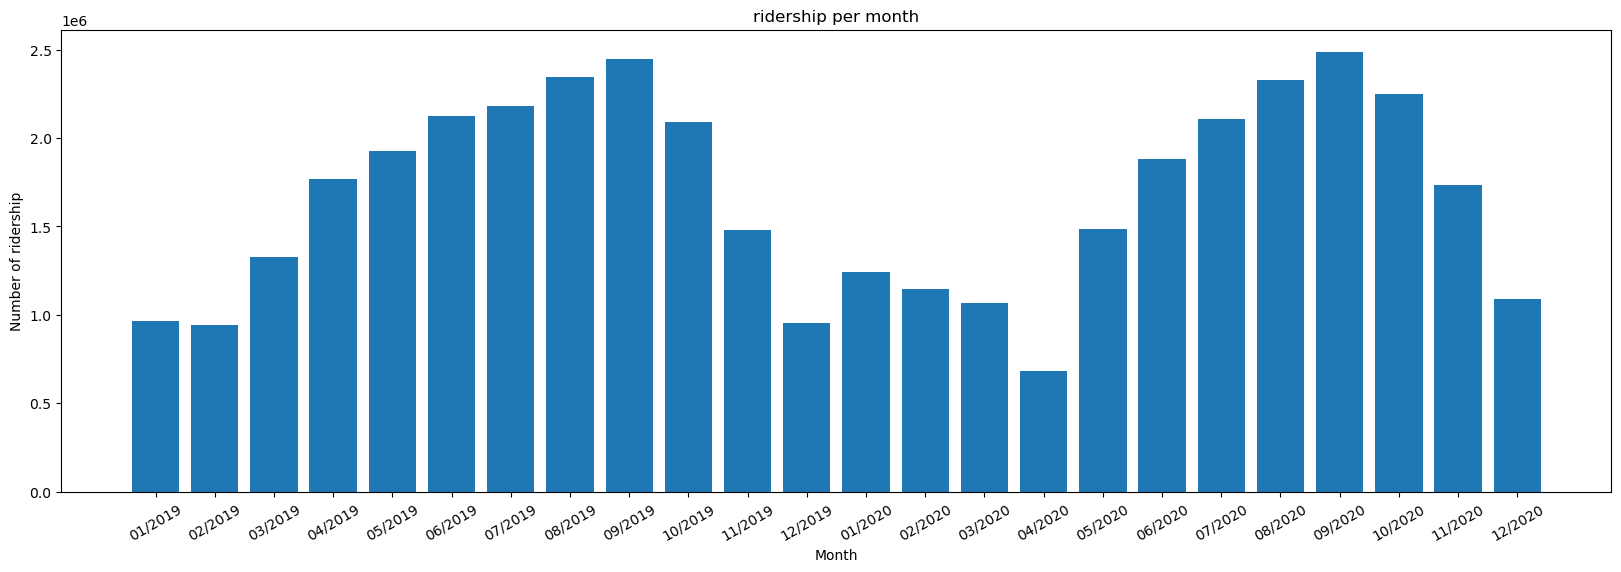

In [29]:
month_2 = []
month_case_count_2 = []

for i in range(len(df2)):
    month_2.append(month_for_df2[i])
    month_case_count_2.append(df2[i].shape[0])

monthly_count_2 = pd.DataFrame({"month": month_2,"month_case_count": month_case_count_2})

plt.figure(figsize=(20,6))
plt.bar(monthly_count_2["month"], monthly_count_2["month_case_count"])
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Month")
plt.ylabel("Number of ridership")
plt.title("ridership per month")

Text(0.5, 1.0, 'ridership/infected per month')

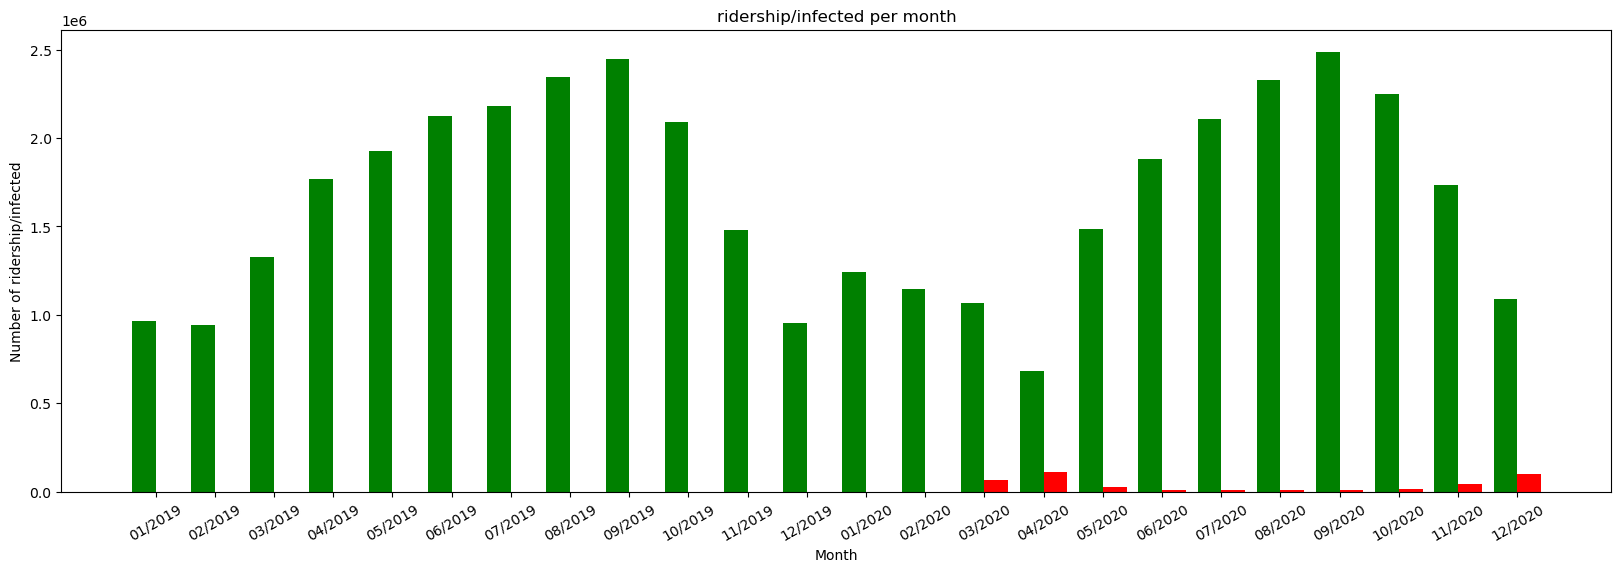

In [28]:
X_axis = np.arange(len(monthly_count_2["month"]))

plt.figure(figsize=(20,6))
plt.bar(X_axis - 0.2, monthly_count_2["month_case_count"], color ='g', width = 0.4)
plt.bar(X_axis + 0.2, monthly_count["month_case_count"], color ='r', width = 0.4)
# plt.bar(monthly_count_2["month"], [monthly_count_2["month_case_count"],monthly_count["month_case_count"]])
plt.xticks(X_axis, monthly_count_2["month"], rotation=30, horizontalalignment="center")
plt.xlabel("Month")
plt.ylabel("Number of ridership/infected")
plt.title("ridership/infected per month")